In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import nestle
from numpy.linalg import eig, inv
from sklearn.covariance import EllipticEnvelope

In [7]:
data = pd.read_csv("dataset5.csv", header=None, names = ["x1","x2","x3"])
data

,x1,x2,x3
0,12.0,12.9,19.6
1,13.6,12.7,14.8
2,11.8,15.3,16.3
3,14.5,13.2,14.7
4,12.1,11.7,15.5
...,...,...,...
995,12.8,11.8,14.5
996,11.5,12.1,17.4
997,11.4,13.6,15.9
998,12.9,13.7,17.4


In [8]:
def plot_ellipsoid_3d(data):
    """Plot the 3-d Ellipsoid ell on the Axes3D ax."""
    
    ell = nestle.bounding_ellipsoids(np.array(data), 0)[0]
    fig = plt.figure(figsize=(10., 10.))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data["x1"], data["x2"], data["x3"], c='k', marker='.')
    
    # points on unit sphere
    u = np.linspace(0.0, 2.0 * np.pi, 100)
    v = np.linspace(0.0, np.pi, 100)
    z = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    x = np.outer(np.ones_like(u), np.cos(v))

    # transform points to ellipsoid
    for i in range(len(x)):
        for j in range(len(x)):
            x[i,j], y[i,j], z[i,j] = ell.ctr + np.dot(ell.axes,
                                                      [x[i,j],y[i,j],z[i,j]])

    ax.plot_wireframe(x, y, z,  rstride=4, cstride=4, color='#2980b9', alpha=0.2)
    
    fig.tight_layout()
    plt.show()
    
    print("Ellipsoid center: ", ell.ctr, "\n")
    print("Coefficient Matrix: ", ell.a)


In [10]:
data = pd.read_csv("dataset4.csv", header=None, names = ["x1","x2","x3"])
ellip = EllipticEnvelope(random_state = 0, contamination = 0.01).fit(data[["x1","x2","x3"]])
ellipAnomaly = ellip.predict(data[["x1","x2","x3"]])
data["Anomaly"] = ellipAnomaly

outlierIndexes = np.where(data["Anomaly"] == 1)
clearIndexes = np.where(data["Anomaly"] == -1)
clearData = data.drop(clearIndexes[0]).drop("Anomaly", 1)
outlierData = data.drop(outlierIndexes[0]).drop("Anomaly", 1)

print(np.linalg.inv(ellip.covariance_))
print(ellip.location_)

[[ 0.35783749 -0.03047825 -0.01182566]
 [-0.03047825  0.59049348 -0.00584069]
 [-0.01182566 -0.00584069  1.15354088]]
[ 9.84974093 18.97647668 10.99067358]


C:\Users\ulvif\AppData\Local\Temp/ipykernel_20316/1556480760.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  clearData = data.drop(clearIndexes[0]).drop("Anomaly", 1)
C:\Users\ulvif\AppData\Local\Temp/ipykernel_20316/1556480760.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  outlierData = data.drop(outlierIndexes[0]).drop("Anomaly", 1)


In [14]:
xx, yy, zz = np.meshgrid(np.linspace(-20, 20, 100), np.linspace(-20, 20, 100), np.linspace(-20, 20, 100))
Z = ellip.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[[-2211.26789952, -2183.03733125, -2155.18339097, ...,
         -1226.48264902, -1234.78499474, -1243.46396843],
        [-2203.9510136 , -2175.71658429, -2147.85878296, ...,
         -1218.79124176, -1227.08972644, -1235.76483909],
        [-2196.75096066, -2168.51267031, -2140.65100793, ...,
         -1211.21666748, -1219.51129111, -1228.18254271],
        ...,
        [-2045.50429379, -2016.89920418, -1988.67074256, ...,
         -1024.39047317, -1032.31829754, -1040.62274989],
        [-2049.52020637, -2020.91125573, -1992.67893306, ...,
         -1028.03186441, -1035.95582774, -1044.25641905],
        [-2053.65295194, -2025.04014024, -1996.80395653, ...,
         -1031.79008863, -1039.71019091, -1048.00692118]],

       [[-2193.64746377, -2165.41498854, -2137.55914129, ...,
         -1208.67723735, -1216.9776761 , -1225.65474282],
        [-2186.32062679, -2158.08429052, -2130.22458222, ...,
         -1200.97587903, -1209.27245673, -1217.94566241],
        [-2179.11062279, 

<IPython.core.display.Javascript object>


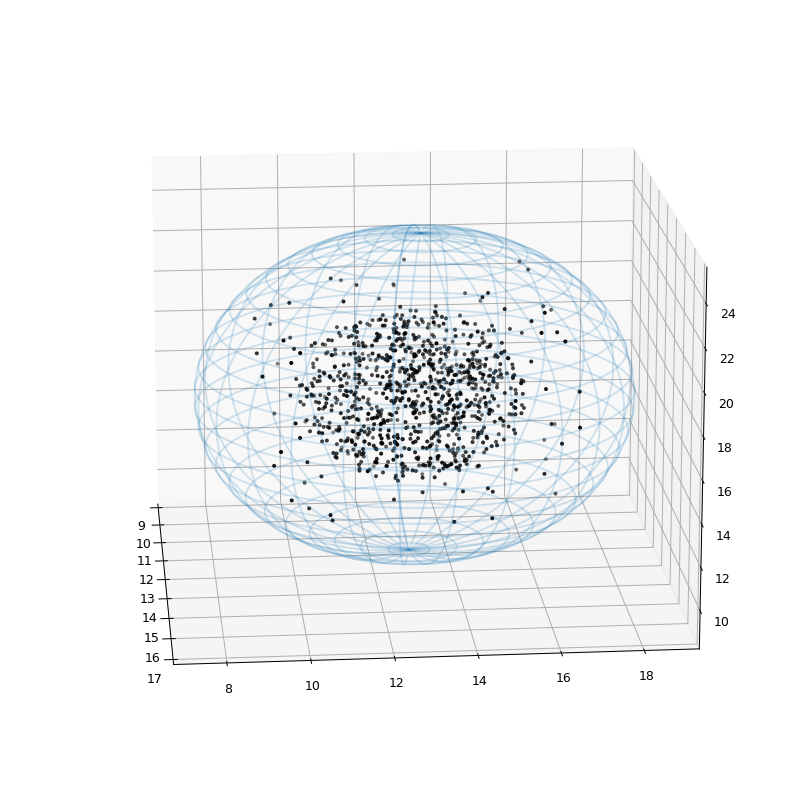

Ellipsoid center:  [13.0127 13.0317 16.9243] 

Coefficient Matrix:  [[ 0.07363465  0.00068783 -0.00021812]
 [ 0.00068783  0.03308887 -0.00030662]
 [-0.00021812 -0.00030662  0.01734596]]


In [4]:
plot_ellipsoid_3d(data)
